In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt

# Intro

This example uses MKSStructureAnalysis to look at loading-induced thermodynamic transition of a metal organic framework (ZIF-8) from low to high loading configurations. The simulation runs for 35 picoseconds with images at every 15 femtoseconds. The images are the hydrogen coordinates mapped to a 3-D grid, resulting in a 70x70x70 A array. Each grid point represents 1 A. The 3-D grid is then mapped into a 2-D array by summing in the z-direction.

# Molecular Dynamics


# Data Generation

In [3]:
from pymks_share import DataManager

manager = DataManager('pymks.me.gatech.edu')

manager.list_datasets()

[u'metallic glass',
 u'random hexagonal orientations',
 u'Molecular Dynamics',
 u'2 phase ising model',
 u'Etched Low Carbon Steel Optical Micrographs']

In [4]:
X = manager.fetch_data('Molecular Dynamics')

In [5]:
print X.shape

(2332, 70, 70)


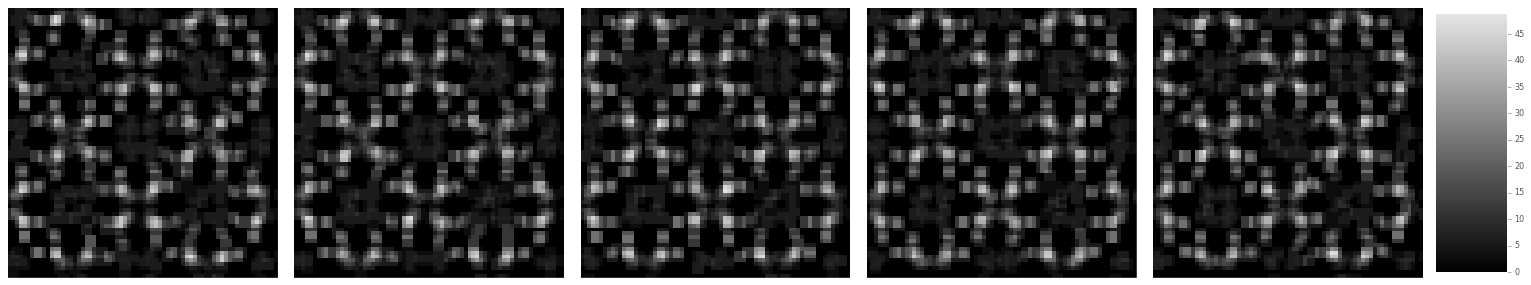

In [15]:
from pymks.tools import draw_microstructures
sample_size = 10
X_examples = X[::sample_size]
draw_microstructures((X_examples[:5]))

In [29]:
from pymks import MKSStructureAnalysis, PrimitiveBasis
from sklearn.decomposition import RandomizedPCA


prim_basis = PrimitiveBasis(2, domain=[0, 255])
analysis = MKSStructureAnalysis(basis=prim_basis,
                                dimension_reducer=RandomizedPCA(),store_correlations=True)


In [25]:
analysis.n_components = 40
analysis.fit(X_examples,periodic_axes=[0,1])

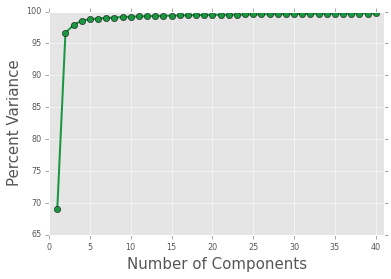

In [26]:
from pymks.tools import draw_component_variance
draw_component_variance(analysis.dimension_reducer.explained_variance_ratio_)


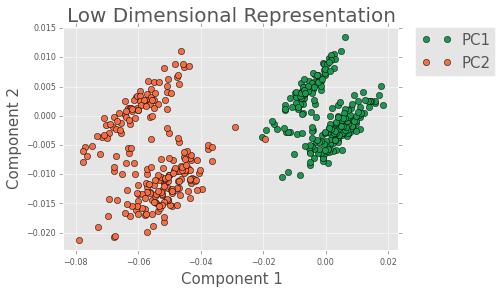

In [28]:
from pymks.tools import draw_components
analysis.fit(X_examples,periodic_axes=[0,1])
analysis.transform(X_examples)
draw_components([analysis.fit_data[:,:2],
                 analysis.transform_data[:,:2]],
                ['PC1','PC2'])

Object `transform` not found.
